<a href="https://colab.research.google.com/github/jmoralespineda/TAM_TEORIA_APRENDIZAJE_DE_MAQUINA/blob/main/EJERCICIO_1_DIST_EUCLIDEA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TAM - Teoria de Aprendizaje de Maquina
#Julian David Morales Pineda
#Ejercicio # 1 - Distancia Euclidea
# 2025 - 2

In [1]:
!pip -q install deepface scipy opencv-python # Instalacion de dependencia


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.3/128.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.9 MB/s eta 0:00:00


In [2]:
from google.colab import files
files.upload()  #cargue de imagenes

Saving man.jpeg to man.jpeg
Saving woman1.jpeg to woman1.jpeg
Saving woman2.jpeg to woman2.jpeg
Saving woman3.jpeg to woman3.jpeg


{'man.jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xe2\x01\xd8ICC_PROFILE\x00\x01\x01\x00\x00\x01\xc8\x00\x00\x00\x00\x040\x00\x00mntrRGB XYZ \x07\xe0\x00\x01\x00\x01\x00\x00\x00\x00\x00\x00acsp\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\tdesc\x00\x00\x00\xf0\x00\x00\x00$rXYZ\x00\x00\x01\x14\x00\x00\x00\x14gXYZ\x00\x00\x01(\x00\x00\x00\x14bXYZ\x00\x00\x01<\x00\x00\x00\x14wtpt\x00\x00\x01P\x00\x00\x00\x14rTRC\x00\x00\x01d\x00\x00\x00(gTRC\x00\x00\x01d\x00\x00\x00(bTRC\x00\x00\x01d\x00\x00\x00(cprt\x00\x00\x01\x8c\x00\x00\x00<mluc\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x0cenUS\x00\x00\x00\x08\x00\x00\x00\x1c\x00s\x00R\x00G\x00BXYZ \x0

In [6]:
#Carga modelo y función de embeddings. Usa FaceNet512 con alineación y RetinaFace. Normaliza a L2 para usar bien la euclídea.
from deepface import DeepFace
import numpy as np

MODEL_NAME = "Facenet512"
# No need to explicitly build the model here if we pass model_name to represent()
# model = DeepFace.build_model(MODEL_NAME)

def embed(img_path: str):
    reps = DeepFace.represent(
        img_path=img_path,
        model_name=MODEL_NAME,
        detector_backend="retinaface",
        align=True,
        enforce_detection=True
    )
    # Si hubiera varias caras, toma la de mayor área
    rep = max(reps, key=lambda r: r["facial_area"]["w"] * r["facial_area"]["h"])
    v = np.array(rep["embedding"], dtype=np.float32)
    v /= np.linalg.norm(v) + 1e-12
    return v

In [9]:
# Se obtiene el embeddings de las 4 fotos
img1 = "/content/woman1.jpeg"
img2 = "/content/woman2.jpeg"
img3 = "/content/woman3.jpeg"
img4 = "/content/man.jpeg"

e1, e2, e3, e4 = map(embed, [img1, img2, img3, img4])

In [11]:
#Calcula distancias euclídeas y matriz completa
from scipy.spatial.distance import cdist

E = np.stack([e1,e2,e3,e4])
names = [img1,img2,img3,img4]
D = cdist(E, E, metric="euclidean")

# Mostrar pares clave
pairs = [("img1-img2", e1, e2),
         ("img1-img3", e1, e3),
         ("img1-img4", e1, e4),
         ("img2-img3", e2, e3),
         ("img2-img4", e2, e4),
         ("img3-img4", e3, e4)]
for label, a, b in pairs:
    print(label, np.linalg.norm(a-b))

# Matriz con etiquetas
import pandas as pd
pd.DataFrame(D, index=names, columns=names)


img1-img2 0.6797236
img1-img3 0.9559894
img1-img4 1.2734712
img2-img3 0.89480376
img2-img4 1.1858566
img3-img4 1.2154309


,/content/woman1.jpeg,/content/woman2.jpeg,/content/woman3.jpeg,/content/man.jpeg
/content/woman1.jpeg,0.000000,0.679724,0.955989,1.273471
/content/woman2.jpeg,0.679724,0.000000,0.894804,1.185857
/content/woman3.jpeg,0.955989,0.894804,0.000000,1.215431
/content/man.jpeg,1.273471,1.185857,1.215431,0.000000


In [13]:
# Decisión automática usando el umbral interno de DeepFace. DeepFace expone un umbral coherente para el modelo y la métrica.

def verify_pair(p1, p2):
    res = DeepFace.verify(
        img1_path=p1,
        img2_path=p2,
        model_name=MODEL_NAME,
        # model=model, # Remove this line
        detector_backend="retinaface",
        distance_metric="euclidean_l2",  # euclídea tras normalización
        align=True,
        enforce_detection=True
    )
    return res["verified"], res["distance"], res["threshold"]

for a,b in [(img1,img2),(img1,img3),(img1,img4),(img2,img4),(img3,img4)]:
    v, d, t = verify_pair(a,b)
    print(f"{a} vs {b} -> verified={v}  distance={d:.4f}  threshold={t:.4f}")

/content/woman1.jpeg vs /content/woman2.jpeg -> verified=True  distance=0.6797  threshold=1.0400
/content/woman1.jpeg vs /content/woman3.jpeg -> verified=True  distance=0.9560  threshold=1.0400
/content/woman1.jpeg vs /content/man.jpeg -> verified=False  distance=1.2735  threshold=1.0400
/content/woman2.jpeg vs /content/man.jpeg -> verified=False  distance=1.1859  threshold=1.0400
/content/woman3.jpeg vs /content/man.jpeg -> verified=False  distance=1.2154  threshold=1.0400


#Resultados Obtenidos.
Distance = qué tan lejos están los vectores de embeddings de dos caras (menor = más parecido).

Threshold = valor de corte que define “misma persona” vs “persona distinta” según el modelo (1.0400 en este caso).

Verified=True/False = decisión automática según si distancia < threshold.

#Comparación por pares:

woman1 vs woman2 → distancia 0.6797 < 1.0400 → True. El modelo considera que son la misma mujer.

woman1 vs woman3 → distancia 0.9560 < 1.0400 → True, aunque cerca del umbral. Son parecidas, pero hay menos seguridad.

woman1 vs man → 1.2735 > 1.0400 → False, no son la misma persona.

woman2 vs man → 1.1859 > 1.0400 → False.

woman3 vs man → 1.2154 > 1.0400 → False.

#Interpretación:
El modelo detecta que las tres fotos de mujeres (woman1, woman2, woman3) están lo bastante próximas para considerarlas del mismo individuo, al menos entre sí. Todas están claramente separadas del hombre.

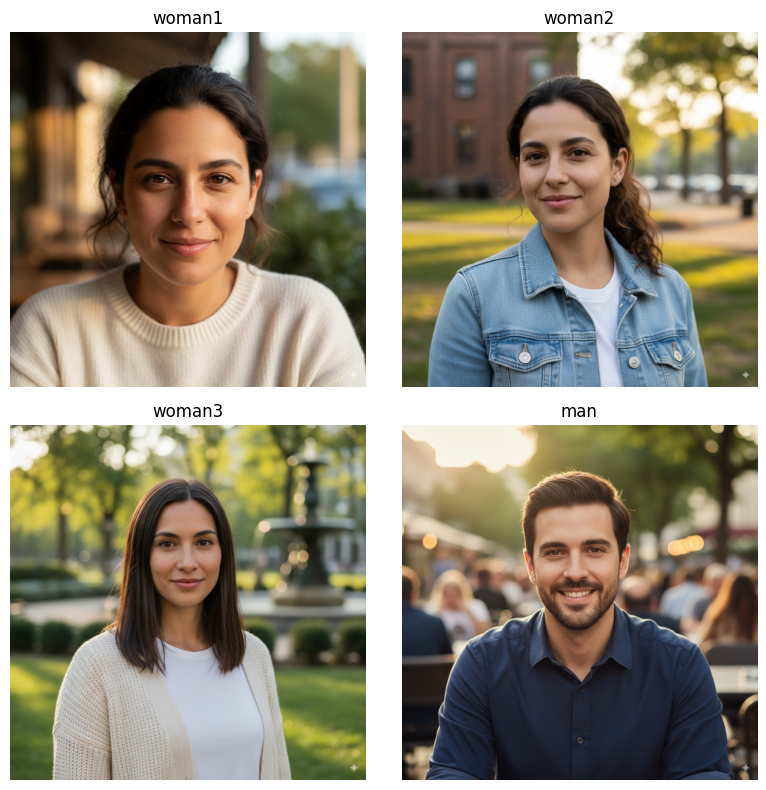

In [14]:
# Visualizacion de las imagenes utilizadas. Luego de tener los resultados de comparación de las imagenes se muestran los rostros que se pidieron comparar y medir la distancia Euclidea.

import matplotlib.pyplot as plt
from PIL import Image

# Rutas de las imágenes
img1 = "/content/woman1.jpeg"
img2 = "/content/woman2.jpeg"
img3 = "/content/woman3.jpeg"
img4 = "/content/man.jpeg"

# Cargar imágenes
images = [Image.open(p) for p in [img1, img2, img3, img4]]
titles = ["woman1", "woman2", "woman3", "man"]

# Mostrar en 2x2
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for ax, img, title in zip(axes.flatten(), images, titles):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()
plt.show()